In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import nltk

file_path = 'parallel-corpus.xlsx'
data = pd.read_excel(file_path)
data=data.sample(50)
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 
                   'Unnamed: 17', 'Unnamed: 16', 'Unnamed: 15', 'Unnamed: 14',
                   'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
                   'Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 
                   'Unnamed: 17', 'Unnamed: 16', 'Unnamed: 15', 'Unnamed: 14',
                   'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'])





# Display the first few rows of the cleaned dataset
data_cleaned.head()
data_cleaned





,SENTENCES,MEANING,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
28174,"Nice place Good food of good quality, tasty an...",اچھی جگہ اچھی کوالٹی کا اچھا کھانا، مزیدار اور...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9950,(Translated by Google) Best katakat n roti k t...,(گوگل کے ذریعہ ترجمہ کیا گیا) بہترین کٹاکت اور...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29695,Just ok,بس ٹھیک ہے,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7314,Best place to eat in the bahadurabad,بہادر آباد میں کھانے کے لیے بہترین جگہ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20532,Best place to have sea food grilled or fried,سی فوڈ گرل یا فرائی کرنے کے لیے بہترین جگہ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2359,I live in a flat above a shop.,میں دکان کے اوپر فلیٹ میں رہتی ہوں۔,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13824,It is We Who created you and gave you shape; t...,7|11|اور ہم ہی نے تم کو (ابتدا میں مٹی سے) پید...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2194,Do you know where Jim and Nancy are?,جم اور نینسی کدھر ہیں؟,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15669,Do they feel secure that there shall come upon...,کیا یہ مطمئن ہیں کہ خدا کے عذاب کی کوئی بلا ان...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16936,” The young girl made a gesture of rage,“ نوجوان لڑکی نے غصے سے اشارہ کیا۔,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_cleaned.isnull().sum() # total null values are

SENTENCES       0
MEANING         1
Unnamed: 2     50
Unnamed: 3     50
Unnamed: 4     50
Unnamed: 5     50
Unnamed: 6     50
Unnamed: 7     50
Unnamed: 8     50
Unnamed: 9     50
Unnamed: 22    50
Unnamed: 23    50
Unnamed: 24    50
Unnamed: 25    50
Unnamed: 26    50
Unnamed: 27    50
Unnamed: 28    50
Unnamed: 29    50
Unnamed: 30    50
Unnamed: 31    49
dtype: int64

In [4]:
data_cleaned.columns
data_cleaned.columns = data_cleaned.columns.str.strip()
data_cleaned.columns

Index(['SENTENCES', 'MEANING', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31'],
      dtype='object')

In [5]:
import nltk
from nltk.corpus import stopwords

# Ensure you have downloaded the stopwords dataset
nltk.download('stopwords')

# Define stop words for English
stop_words = set(stopwords.words('english'))

# Function to preprocess sentences
def preprocess_sentence(sentence):
    # Tokenize and remove stop words
    words = sentence.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:

# Convert columns to string type (if they are not already)
data_cleaned['SENTENCES'] = data_cleaned['SENTENCES'].astype(str)
data_cleaned['MEANING'] = data_cleaned['MEANING'].astype(str)


In [7]:
english_sentences = data_cleaned['SENTENCES'].values  # processing into values
urdu_sentences = data_cleaned['MEANING'].values
print(english_sentences)
print(urdu_sentences)

['Nice place Good food of good quality, tasty and yummy.'
 '(Translated by Google) Best katakat n roti k to kya kehney' 'Just ok'
 'Best place to eat in the bahadurabad'
 'Best place to have sea food grilled or fried'
 'I live in a flat above a shop.'
 'It is We Who created you and gave you shape; then We bade the angels prostrate to Adam, and they prostrate; not so Iblis; He refused to be of those who prostrate.'
 'Do you know where Jim and Nancy are?'
 'Do they feel secure that there shall come upon them no enveloping of the chastisement of God, or that the Hour shall not come upon them suddenly when they are unaware?'
 '” The young girl made a gesture of rage'
 '(Translated by Google) Awesome Karhai'
 'Awesome food and beautiful place for Dine'
 "Pharaoh said, 'Have you believed him before I gave you leave? Why, he is the chief of you, the same that taught you sorcery; I shall assuredly cut off alternately your hands and feet, then I shall crucify you upon the trunks of palm-trees; 

In [8]:
data_cleaned['SENTENCES']=data_cleaned['SENTENCES'].apply(preprocess_sentence)

In [9]:
data_cleaned['SENTENCES']

28174      Nice place Good food good quality, tasty yummy.
9950     (Translated Google) Best katakat n roti k kya ...
29695                                                   ok
7314                            Best place eat bahadurabad
20532                    Best place sea food grilled fried
2359                                       live flat shop.
13824    created gave shape; bade angels prostrate Adam...
2194                                   know Jim Nancy are?
15669    feel secure shall come upon enveloping chastis...
16936                       ” young girl made gesture rage
9907                    (Translated Google) Awesome Karhai
8524                     Awesome food beautiful place Dine
16385    Pharaoh said, 'Have believed gave leave? Why, ...
2940                                           train late.
20784                                        Taste awesome
26030                  Food test normal soo good rate 6/10
7124                                  taste different pa

In [10]:
urdu_stopwords = {
    'اور', 'یہ', 'وہ', 'ہے', 'تھا', 'تھی', 'تھے', 'ہوں', 
    'ہیں', 'کی', 'کے', 'کو', 'سے', 'پر', 'میں', 'کا', 
    'نے', 'اگر', 'جب', 'تو', 'ہی', 'بھی', 'کہ', 
    'گے', 'گی', 'کا', 'کیا', 'کرتا', 'کرنا', 'کر', 'کیے'
}

def remove_stopwords(text):
    # """
    # Remove stop words from an Urdu sentence.

    # Parameters:
    # text (str): Input sentence in Urdu.

    # Returns:
    # str: Sentence with stop words removed.
    # """
    words = text.split()  # Tokenize the sentence
    filtered_words = [word for word in words if word not in urdu_stopwords]  # Filter out stop words
    return ' '.join(filtered_words)  # Join the words back into a sentence

# Example Usage: Apply function to 'MEANING' column
data_cleaned['MEANING'] = data_cleaned['MEANING'].apply(remove_stopwords)


In [11]:
data_cleaned['MEANING'] 

28174        اچھی جگہ اچھی کوالٹی اچھا کھانا، مزیدار لذیذ۔
9950         (گوگل ذریعہ ترجمہ گیا) بہترین کٹاکت روٹی کہنا
29695                                              بس ٹھیک
7314                       بہادر آباد کھانے لیے بہترین جگہ
20532              سی فوڈ گرل یا فرائی کرنے لیے بہترین جگہ
2359                              دکان اوپر فلیٹ رہتی ہوں۔
13824    7|11|اور ہم تم (ابتدا مٹی سے) پیدا پھر تمہاری ...
2194                                    جم نینسی کدھر ہیں؟
15669    مطمئن خدا عذاب کوئی بلا انہیں دبوچ نہ لے یا بے...
16936                         “ نوجوان لڑکی غصے اشارہ کیا۔
9907                      (گوگل طرف ترجمہ) بہت اچھے Karhai
8524                    کھانے لیے شاندار کھانا خوبصورت جگہ
16385    فرعون کہا " تم ایمان لے آئے قبل اس تمہیں اس اج...
2940                                       اپ ٹرین لیٹ ہے۔
20784                                     ذائقہ لاجواب ہے۔
26030          فوڈ ٹیسٹ نارمل اتنا اچھا ریٹ 6/10 نہیں تھا۔
7124                                  ذائقہ ماضی مختلف ہ

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer  # Import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Initialize the Tokenizer for English sentences
eng_tokenizer = Tokenizer()  # Create an instance of the Tokenizer

# Fit the tokenizer on the English sentences to learn the word index
eng_tokenizer.fit_on_texts(english_sentences)  # This will build the word index based on frequency

# Convert English sentences to sequences of integers
eng_sequences = eng_tokenizer.texts_to_sequences(english_sentences)  # Each word is replaced by its index

# Find the maximum length of the sequences for padding purposes
max_len = max(len(seq) for seq in eng_sequences)  # Calculate the maximum length of the sequences

# Pad the sequences to ensure they all have the same length
X = pad_sequences(eng_sequences, maxlen=max_len, padding='post')  # Pad with zeros at the end (post padding)


In [13]:
# Tokenization for Urdu
urdu_tokenizer = Tokenizer()  # Create an instance of the Tokenizer for Urdu sentences

# Fit the tokenizer on the Urdu sentences to learn the word index
urdu_tokenizer.fit_on_texts(urdu_sentences)  # This builds the word index based on frequency of words in the sentences

# Convert Urdu sentences to sequences of integers
urdu_sequences = urdu_tokenizer.texts_to_sequences(urdu_sentences)  # Each word in Urdu sentences is replaced by its index

# Pad the sequences to ensure they all have the same length for model training
y = pad_sequences(urdu_sequences, maxlen=max_len, padding='post')  # Pad sequences with zeros at the end (post padding)


In [14]:
print("X",X)
print("y:",y)

X [[ 35  17   3 ...   0   0   0]
 [ 36  28  37 ...   0   0   0]
 [ 98  99   0 ...   0   0   0]
 ...
 [ 86  25   2 ...   0   0   0]
 [  3  90 347 ...   0   0   0]
 [ 21  91  67 ...   0   0   0]]
y: [[ 13  15  13 ...   0   0   0]
 [ 46   1  62 ...   0   0   0]
 [ 64  65   4 ...   0   0   0]
 ...
 [367 368  20 ...   0   0   0]
 [370 371 372 ...   0   0   0]
 [ 17  54 373 ...   0   0   0]]


In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (80%), validation (10%), and test sets (10%)
# Assuming X is the English sequences and y is the Urdu sequences
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% training
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 10% validation, 10% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
# # Check the shapes to ensure correct splitting
# print(f"Training set: X_train shape = {X_train.shape}, y_train shape = {y_train.shape}")
# print(f"Validation set: X_val shape = {X_val.shape}, y_val shape = {y_val.shape}")
# print(f"Test set: X_test shape = {X_test.shape}, y_test shape = {y_test.shape}")

# # Optional: Save the splits to CSV files if needed
# # Converting to DataFrame for saving if you prefer
# import pandas as pd

# train_df = pd.DataFrame({'English': list(X_train), 'Urdu': list(y_train)})
# val_df = pd.DataFrame({'English': list(X_val), 'Urdu': list(y_val)})
# test_df = pd.DataFrame({'English': list(X_test), 'Urdu': list(y_test)})

# # Save to CSV files
# train_df.to_csv('train_data.csv', index=False)
# val_df.to_csv('val_data.csv', index=False)
# test_df.to_csv('test_data.csv', index=False)

# # Display a few rows from each split
# print("\nTraining Data Sample:")
# print(train_df.head())

# print("\nValidation Data Sample:")
# print(val_df.head())

# print("\nTest Data Sample:")
# print(test_df.head())


In [16]:
vocab_size_eng = len(eng_tokenizer.word_index) + 1  # Vocabulary size for English (+1 for padding)
print(f"English Vocabulary Size: {vocab_size_eng}")
vocab_size_urdu = len(urdu_tokenizer.word_index) + 1  # Vocabulary size for Urdu (+1 for padding)
print(f"Urdu Vocabulary Size: {vocab_size_urdu}")

English Vocabulary Size: 352
Urdu Vocabulary Size: 374


In [17]:
X_train

array([[136,  66, 137, ...,   0,   0,   0],
       [ 38,  17,   7, ...,   0,   0,   0],
       [  3,  17,   3, ...,   0,   0,   0],
       ...,
       [ 25,   5,  24, ...,   0,   0,   0],
       [  4,   5, 294, ...,   0,   0,   0],
       [ 24,   4,   9, ...,   0,   0,   0]])

In [18]:
# Build Many-to-Many RNN Model
import tensorflow as tf
model_rnn = tf.keras.Sequential([  # Create a sequential model
    tf.keras.layers.Embedding(input_dim=len(eng_tokenizer.word_index) + 1, output_dim=128, input_length=max_len),  
    # Embedding layer to convert integer indices into dense vectors of size 128
    # input_dim: Size of the vocabulary (number of unique words + 1 for padding)
    # output_dim: Dimensionality of the dense embedding (128 dimensions)
    # input_length: Length of input sequences (max_len from padding)

    tf.keras.layers.SimpleRNN(512, return_sequences=True),  
    # Simple RNN layer with 128 units
    # return_sequences=True: Ensures that the output will be a sequence of the same length as the input sequences

    tf.keras.layers.Dense(len(urdu_tokenizer.word_index) + 1, activation='softmax')  
    # Dense output layer with softmax activation for multi-class classification
    # The number of units corresponds to the number of unique words in the Urdu vocabulary
    # +1 is added for padding
])


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [19]:
# Compile the Many-to-Many RNN Model
model_rnn.compile(
    optimizer='adam',  # Adam optimizer for adaptive learning rate
    loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
    metrics=['accuracy']  # Metrics to evaluate during training and testing
)


In [20]:
# Train the Many-to-Many RNN Model
rnn_history=model_rnn.fit(
    X_train,          # Training data (input sequences)
    y_train,          # Training labels (target sequences)
    epochs=30,         # Number of epochs to train the model
    batch_size=128,    # Number of samples per gradient update
    validation_data=(X_test, y_test)  # Data to evaluate the model's performance after each epoch
)
# Train the RNN model and store the history

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 4.5181e-04 - loss: 5.9273 - val_accuracy: 0.9512 - val_loss: 4.6003
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step - accuracy: 0.8967 - loss: 4.6727 - val_accuracy: 0.9620 - val_loss: 2.4067
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 653ms/step - accuracy: 0.9011 - loss: 2.6137 - val_accuracy: 0.9651 - val_loss: 0.7110
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step - accuracy: 0.9014 - loss: 1.0557 - val_accuracy: 0.9657 - val_loss: 0.3407
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step - accuracy: 0.9012 - loss: 0.7953 - val_accuracy: 0.9669 - val_loss: 0.2980
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - accuracy: 0.9012 - loss: 0.8346 - val_accuracy: 0.9663 - val_loss: 0.2948
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9012 - loss: 0.8880 - val_accuracy: 0.9663 - val_loss: 0.2974
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.9012 - loss: 0.9256 - val_accuracy: 0.9663 - val_loss

In [21]:
import numpy as np
def translate_sentence(sentence):
   
    # Convert the input sentence into a sequence of integers using the English tokenizer
    sequence = eng_tokenizer.texts_to_sequences([sentence])
    
    # Pad the sequence to ensure it matches the maximum length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    
    # Use the trained LSTM model to predict the output (Urdu sentence)
    prediction = model_rnn.predict(padded_sequence)
    
    # Convert the predicted probabilities into word indices
    predicted_sequence = np.argmax(prediction, axis=-1)[0]
    
    # Convert the word indices back into words using the Urdu tokenizer's index-to-word mapping
    translated = ' '.join([urdu_tokenizer.index_word.get(idx, '') for idx in predicted_sequence])
    
    # Return the translated Urdu sentence as a string
    return translated


In [22]:

# Testing with Example Sentences
test_sentences = [
    "What is your name?",          # Simple question to test basic sentence translation
    "I am learning machine learning.",  # A sentence with technical terms to test model’s vocabulary
    "Let's go to the park today.", # Checks if the model can handle suggestions or commands
    "How do I cook biryani?",      # A complex question with cultural relevance
    "Can you help me with my homework?"  # Tests translation involving polite requests
]

# Loop through each test sentence and print the English and translated Urdu sentences
for sentence in test_sentences:
    translated = translate_sentence(sentence)  # Call the translation function
    print(f"English: {sentence}")              # Display original English sentence
    print(f"Urdu Translation: {translated}")   # Display translated Urdu sentence
    print("-" * 50)                            # Separator for readability


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
English: What is your name?
Urdu Translation:                                                                                                                                                                      
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
English: I am learning machine learning.
Urdu Translation: ہوں                                                                                                                                                                     
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
English: Let's go to the park today.
Urdu Translation:                                                                                                                                                                      
--------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
English: How do I cook biryani?

In [23]:
from nltk.translate.bleu_score import sentence_bleu  # For evaluating translation quality with BLEU score

# Evaluate the model
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test, y_test)  
# Evaluate the model on the test set and get the loss and accuracy
print(f"RNN Model Loss: {rnn_loss}, Accuracy: {rnn_accuracy}")  
# Print the loss and accuracy of the RNN model on the test data

# BLEU Score for a sample test sentence
sample_eng = X_test[0:1]  # Select a single sample from the test set for prediction
predicted_urdu = model_rnn.predict(sample_eng)  
# Generate predictions for the sample input using the trained model

predicted_urdu_sentence = np.argmax(predicted_urdu, axis=-1)  
# Get the index of the maximum predicted value for each time step to obtain the predicted Urdu sentence
print(f"BLEU Score: {sentence_bleu([y_test[0]], predicted_urdu_sentence[0])}")  
# Calculate and print the BLEU score comparing the predicted sentence with the actual Urdu sentence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.9651 - loss: 0.2703
RNN Model Loss: 0.2702816426753998, Accuracy: 0.9650602340698242
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
BLEU Score: 0.9756827532537652


In [24]:
# # Pad the sequences so that all sentences have the same length
# X_train_padded = pad_sequences(X_train_seq, padding='post')
# y_train_padded = pad_sequences(y_train_seq, padding='post')

# X_val_padded = pad_sequences(X_val_seq, padding='post')
# y_val_padded = pad_sequences(y_val_seq, padding='post')

# X_test_padded = pad_sequences(X_test_seq, padding='post')
# y_test_padded = pad_sequences(y_test_seq, padding='post')

# # Check the shapes after padding to ensure sequences are correct
# print(f"Training set: X_train shape = {X_train_padded.shape}, y_train shape = {y_train_padded.shape}")
# print(f"Validation set: X_val shape = {X_val_padded.shape}, y_val shape = {y_val_padded.shape}")
# print(f"Test set: X_test shape = {X_test_padded.shape}, y_test shape = {y_test_padded.shape}")
# print(X_train_padded)
# print(y_train_padded)
# print(X_val_padded)
# print(y_val_padded)
# print(X_test_padded)
# print(y_test_padded)

LSTM Baised

In [25]:
# Build Many-to-Many LSTM Model
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(eng_tokenizer.word_index) + 1,  # Size of the input vocabulary
                               output_dim=128,  # Dimensionality of the embedding space
                               input_length=max_len),  # Length of input sequences
    tf.keras.layers.LSTM(128, return_sequences=True),  # LSTM layer with 128 units, returns sequences for many-to-many mapping
    tf.keras.layers.Dense(len(urdu_tokenizer.word_index) + 1, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the Many-to-Many LSTM Model
model_lstm.compile(optimizer='adam',  # Adam optimizer for efficient training
                   loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification
                   metrics=['accuracy'])  # Track accuracy during training and evaluation


In [26]:
# Train the Many-to-Many LSTM Model
lstm_history=model_lstm.fit(
    X_train,          # Training data (input sequences for English sentences)
    y_train,          # Training labels (target sequences for Urdu sentences)
    epochs=20,         # Number of epochs to train the model
    batch_size=64,    # Number of samples per gradient update
    validation_data=(X_test, y_test)  # Data to evaluate the model's performance after each epoch
)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 3.0120e-04 - loss: 5.9336 - val_accuracy: 0.9578 - val_loss: 5.6192
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.9002 - loss: 5.6363 - val_accuracy: 0.9596 - val_loss: 5.1960
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.9014 - loss: 5.2369 - val_accuracy: 0.9657 - val_loss: 4.6065
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9012 - loss: 4.6803 - val_accuracy: 0.9663 - val_loss: 3.8988
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - accuracy: 0.9012 - loss: 4.0122 - val_accuracy: 0.9663 - val_loss: 3.1941
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 677ms/step - accuracy: 0.9012 - loss: 3.3477 - val_accuracy: 0.9663 - val_loss: 2.5853
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step - accuracy: 0.9012 - loss: 2.7744 - val_accuracy: 0.9663 - val_loss: 2.0807
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step - accuracy: 0.9012 - loss: 2.3002 - val_accuracy: 0.9663 - val_loss

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9663 - loss: 0.2779
LSTM Model Loss: 0.27792757749557495, Accuracy: 0.966265082359314
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
LSTM BLEU Score: 0.9756827532537652


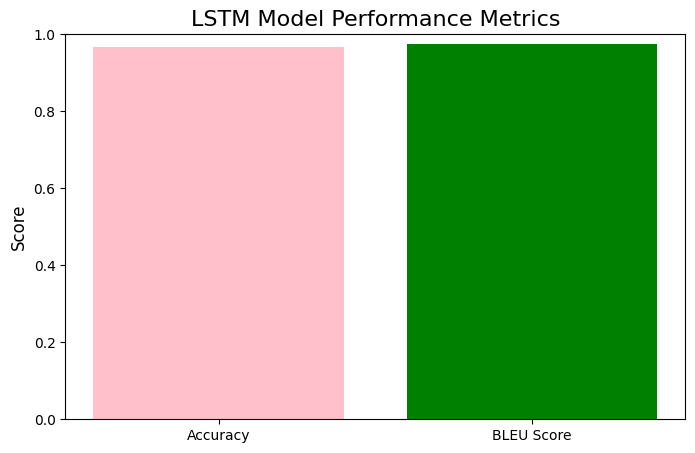

In [27]:
import matplotlib.pyplot as plt

# Evaluate the LSTM model on the test data
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test, y_test)
print(f"LSTM Model Loss: {lstm_loss}, Accuracy: {lstm_accuracy}")

# BLEU Score Calculation for LSTM Model
predicted_urdu_lstm = model_lstm.predict(sample_eng)  # Predict output for a sample English sentence
predicted_urdu_lstm_sentence = np.argmax(predicted_urdu_lstm, axis=-1)  # Convert probabilities to word indices

# Calculate BLEU Score between predicted Urdu sentence and actual target sentence
bleu_score = sentence_bleu([y_test[0]], predicted_urdu_lstm_sentence[0])
print(f"LSTM BLEU Score: {bleu_score}")

# Plotting BLEU Score and Accuracy Visualization
metrics = ['Accuracy', 'BLEU Score']
values = [lstm_accuracy, bleu_score]

# Create a bar plot for model performance metrics
plt.figure(figsize=(8, 5))  # Set figure size
plt.bar(metrics, values, color=['pink', 'green'])  # Bar chart with different colors
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (as both metrics are percentages)
plt.title('LSTM Model Performance Metrics', fontsize=16)  # Plot title
plt.ylabel('Score', fontsize=12)  # y-axis label
plt.show()  # Display the plot


In [28]:
def translate_sentence(sentence):
    """
    Translates a given English sentence into Urdu using the trained LSTM model.

    Parameters:
    sentence (str): The input English sentence to be translated.

    Returns:
    str: The translated Urdu sentence.
    """
    # Convert the input sentence into a sequence of integers using the English tokenizer
    sequence = eng_tokenizer.texts_to_sequences([sentence])
    
    # Pad the sequence to ensure it matches the maximum length used during training
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')
    
    # Use the trained LSTM model to predict the output (Urdu sentence)
    prediction = model_lstm.predict(padded_sequence)
    
    # Convert the predicted probabilities into word indices
    predicted_sequence = np.argmax(prediction, axis=-1)[0]
    
    # Convert the word indices back into words using the Urdu tokenizer's index-to-word mapping
    translated = ' '.join([urdu_tokenizer.index_word.get(idx, '') for idx in predicted_sequence])
    
    # Return the translated Urdu sentence as a string
    return translated


In [29]:
# Testing with Example Sentences
test_sentences = [
    "What is your name?",                # Simple question to test basic sentence translation
    "I am learning machine learning.",   # A sentence with technical terms to test model’s vocabulary
    "Let's go to the park today.",       # Checks if the model can handle suggestions or commands
    "How do I cook biryani?",            # A complex question with cultural relevance
    "Can you help me with my homework?"  # Tests translation involving polite requests
]

# Function to translate sentences (assuming translate_sentence is a pre-defined function)
def translate_sentence(sentence, model, tokenizer, max_len):
    # Tokenize and encode the input sentence
    input_ids = tokenizer.encode(sentence, return_tensors="pt", truncation=True, max_length=max_len, padding='max_length')
    
    # Use the model to generate the translation
    output_ids = model.generate(input_ids, max_length=max_len, num_beams=5, early_stopping=True)
    
    # Decode the generated tokens back to a string
    translated_sentence = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return translated_sentence

# Loop through each test sentence and print the English and translated Urdu sentences
for sentence in test_sentences:
    translated = translate_sentence(sentence, model, tokenizer, max_len=50)  # max_len depends on your model settings
    print(f"English: {sentence}")              # Display original English sentence
    print(f"Urdu Translation: {translated}")   # Display translated Urdu sentence
    print("-" * 50)                            # Separator for readability


NameError: name 'model' is not defined